# Mushrooms

For this exercise we're going to work with a dataset on mushrooms. More information on the dataset, take a look at [the webpage of the original study that is the source of this dataset](http://archive.ics.uci.edu/ml/datasets/Mushroom). 

The dataset contains an annotated collection of edible and poisonous mushrooms. The ediblity is related to many other properties, like the odor of the mushroom, the cap shape, the cap color, etc.

**Note**: For this assignment you'll have to use your new skills from the data-visualisation Kaggle course.

### Acknowledgments

This notebook is based on materials from the Minor AI program, specifically the Course Python for Data Processing. Special thanks to Wouter Vrielink & Tim Doolan for providing these materials.

### Assignment

Every data science project begins with a *main research question*, which guides the analysis. Normally, you'd have to come up with this question yourself, but for this assignment, we've already provided it. The main question for this dataset is:

*What insights can the characteristics of mushrooms provide about their edibility or poisoning risk?*

In other words: given the characteristics of a mushroom, can we determine whether it's edible or poisonous?

To help you answer the main question, we’ve provided some sub-questions, which mirror the process of a real data science project. You'll first address these sub-questions, and then use your findings to answer the main question.

We’ve also included some code to help make the dataframe more readable and assist with your analysis.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

nested_value_dict = {'class': {'p': 'poisonous', 'e': 'edible'}
     , 'cap-shape': {'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat', 'k': 'knobbed', 's': 'sunken'}
     , 'cap-surface': {'f': 'fibrous', 'g': 'grooves', 'y': 'scaly', 's': 'smooth'}
     , 'cap-color': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'r': 'green', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'bruises': {'t': 'bruises', 'f': 'no'}
     , 'odor': {'a': 'almond', 'l': 'anise', 'c': 'creosote', 'y': 'fishy', 'f': 'foul', 'm': 'musty', 'n': 'none', 'p': 'pungent', 's': 'spicy'}
     , 'gill-attachment': {'a': 'attached', 'd': 'descending', 'f': 'free', 'n': 'notched'}
     , 'gill-spacing': {'c': 'close', 'w': 'crowded', 'd': 'distant'}
     , 'gill-size': {'b': 'broad', 'n': 'narrow'}
     , 'gill-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'g': 'gray', 'r': 'green', 'o': 'orange', 'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'stalk-shape': {'e': 'enlarging', 't': 'tapering'}
     , 'stalk-root': {'b': 'bulbous', 'c': 'club', 'u': 'cup', 'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted', '?': 'missing'}
     , 'stalk-surface-above-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
     , 'stalk-surface-below-ring': {'f': 'fibrous', 'y': 'scaly', 'k': 'silky', 's': 'smooth'}
     , 'stalk-color-above-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'stalk-color-below-ring': {'n': 'brown', 'b': 'buff', 'c': 'cinnamon', 'g': 'gray', 'o': 'orange', 'p': 'pink', 'e': 'red', 'w': 'white', 'y': 'yellow'}
     , 'veil-type': {'p': 'partial', 'u': 'universal'}, 'veil-color': {'n': 'brown', 'o': 'orange', 'w': 'white', 'y': 'yellow'}
     , 'ring-number': {'n': 'none', 'o': 'one', 't': 'two'}
     , 'ring-type': {'c': 'cobwebby', 'e': 'evanescent', 'f': 'flaring', 'l': 'large', 'n': 'none', 'p': 'pendant', 's': 'sheathing', 'z': 'zone'}
     , 'spore-print-color': {'k': 'black', 'n': 'brown', 'b': 'buff', 'h': 'chocolate', 'r': 'green', 'o': 'orange', 'u': 'purple', 'w': 'white', 'y': 'yellow'}
     , 'population': {'a': 'abundant', 'c': 'clustered', 'n': 'numerous', 's': 'scattered', 'v': 'several', 'y': 'solitary'}
     , 'habitat': {'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths', 'u': 'urban', 'w': 'waste', 'd': 'woods'}}

df_mushroom = pd.read_csv('mushrooms.csv')
df_mushroom = df_mushroom.replace(nested_value_dict)

***Q1 Initial Exploration***
 
Create a bar chart showing the number of edible and poisonous mushrooms for each cap shape. Make sure you understand the distribution of edibility across cap shapes.

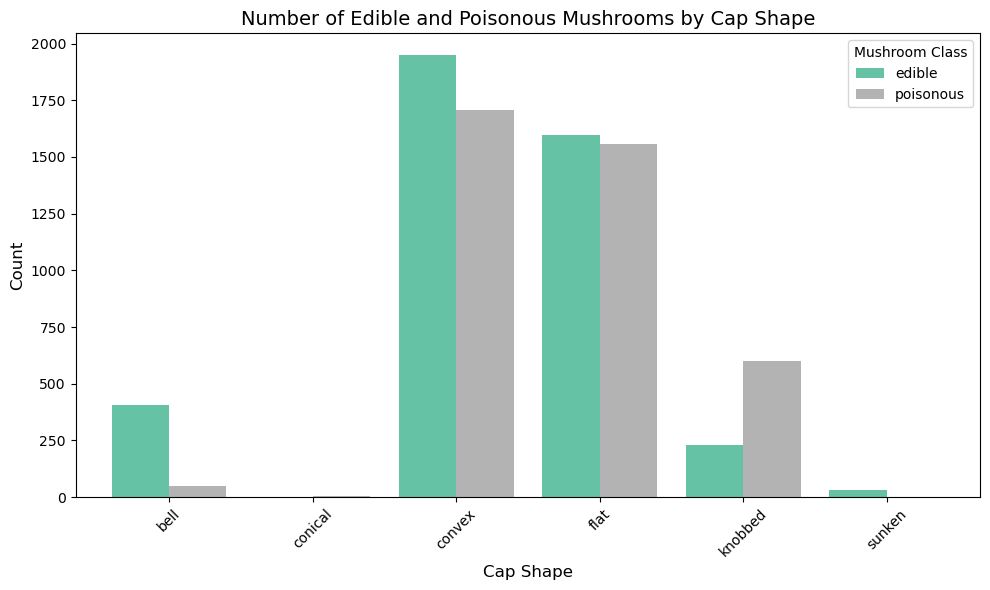

In [4]:
# Create a crosstab for counts
counts = pd.crosstab(df_mushroom['cap-shape'], df_mushroom['class'])

# Plot side-by-side bars instead of stacked bars
counts.plot(kind='bar', figsize=(10, 6), colormap='Set2', width=0.8)

# Add title and labels
plt.title('Number of Edible and Poisonous Mushrooms by Cap Shape', fontsize=14)
plt.xlabel('Cap Shape', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)  # Rotate cap-shape labels for readability
plt.legend(title='Mushroom Class', fontsize=10)
plt.tight_layout()

# Show the improved chart
plt.show()

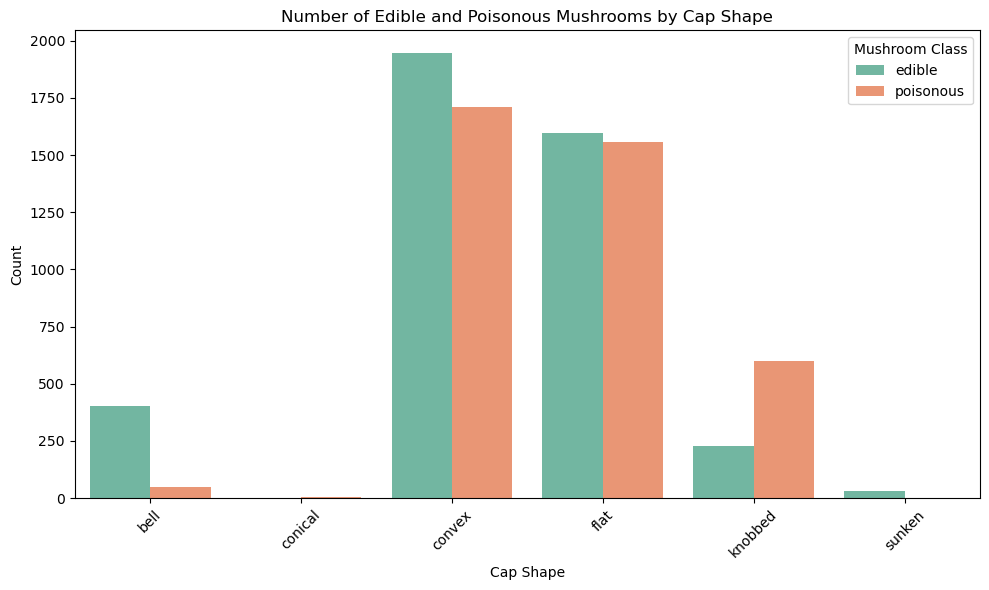

In [5]:
count_data = df_mushroom.groupby(['cap-shape', 'class']).size().reset_index(name='count')

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=count_data, x='cap-shape', y='count', hue='class', palette='Set2')
plt.title('Number of Edible and Poisonous Mushrooms by Cap Shape')
plt.xlabel('Cap Shape')
plt.ylabel('Count')
plt.legend(title='Mushroom Class')
plt.xticks(rotation=45)
plt.tight_layout()

# Display the chart
plt.show()

***Q2 Reflection on Findings***

What patterns or differences do you observe in the bar chart? Are there any apparent relationships between cap shape and edibility? Think about limitations or potential biases in this visualization.

> *Your answer goes here*

***Q3 Choosing Additional Variables***

Explore other mushroom characteristics. Use the methods you've learned previously, or other techniques you're familiar with. Select variables that you believe could impact edibility. Explain why you chose these particular characteristics.



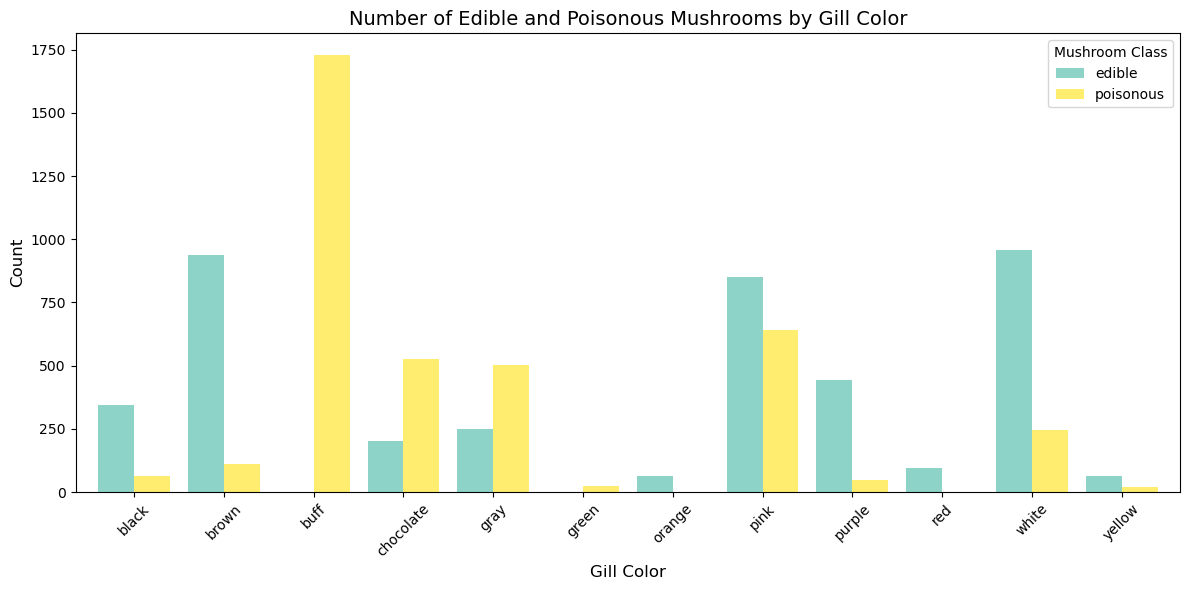

In [9]:
# Crosstab for 'gill-color' vs 'class'
gill_color_crosstab = pd.crosstab(df_mushroom['gill-color'], df_mushroom['class'])

# Plot for 'gill-color'
gill_color_crosstab.plot(kind='bar', figsize=(12, 6), colormap='Set3', width=0.8)
plt.title('Number of Edible and Poisonous Mushrooms by Gill Color', fontsize=14)
plt.xlabel('Gill Color', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Mushroom Class', fontsize=10)
plt.tight_layout()
plt.show()

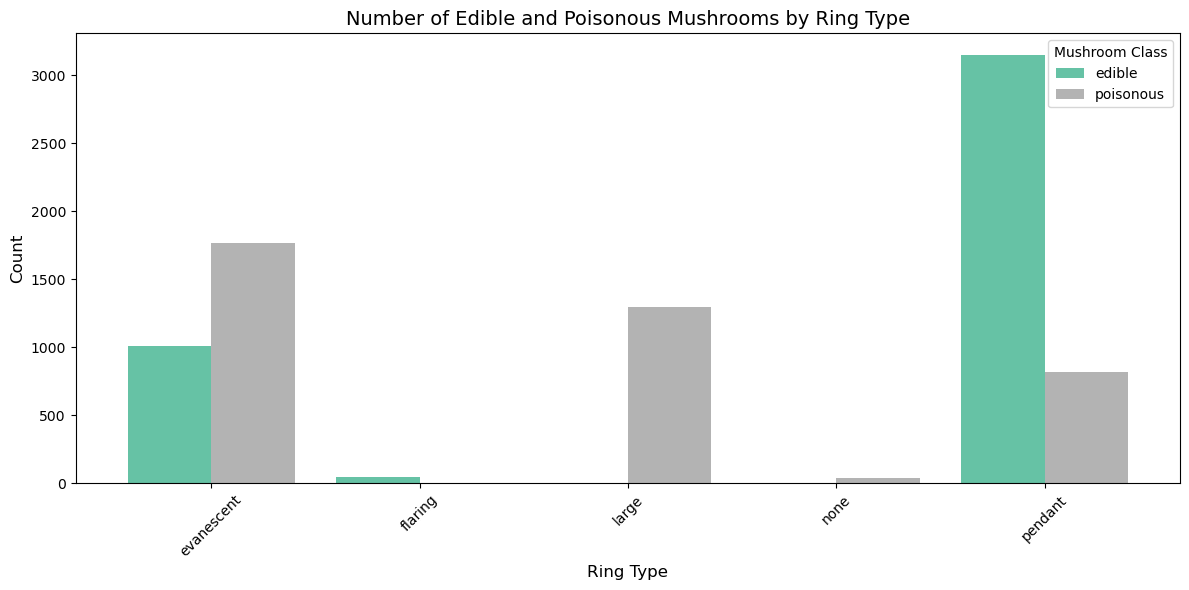

In [10]:
# Crosstab for 'ring-type' vs 'class'
ring_type_crosstab = pd.crosstab(df_mushroom['ring-type'], df_mushroom['class'])

# Plot for 'ring-type'
ring_type_crosstab.plot(kind='bar', figsize=(12, 6), colormap='Set2', width=0.8)
plt.title('Number of Edible and Poisonous Mushrooms by Ring Type', fontsize=14)
plt.xlabel('Ring Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Mushroom Class', fontsize=10)
plt.tight_layout()
plt.show()

> *Your answer goes here*

***Q4 Heatmap Visualization***

Pick two categorical variables (other than cap shape) to create a heatmap, showing counts of edible (or poisonous) mushrooms for these variables. Examine potential relationships between the two variables you've chosen in Q3 and edibility.

**Tip**: Label the axes and add a color scale for clarity.

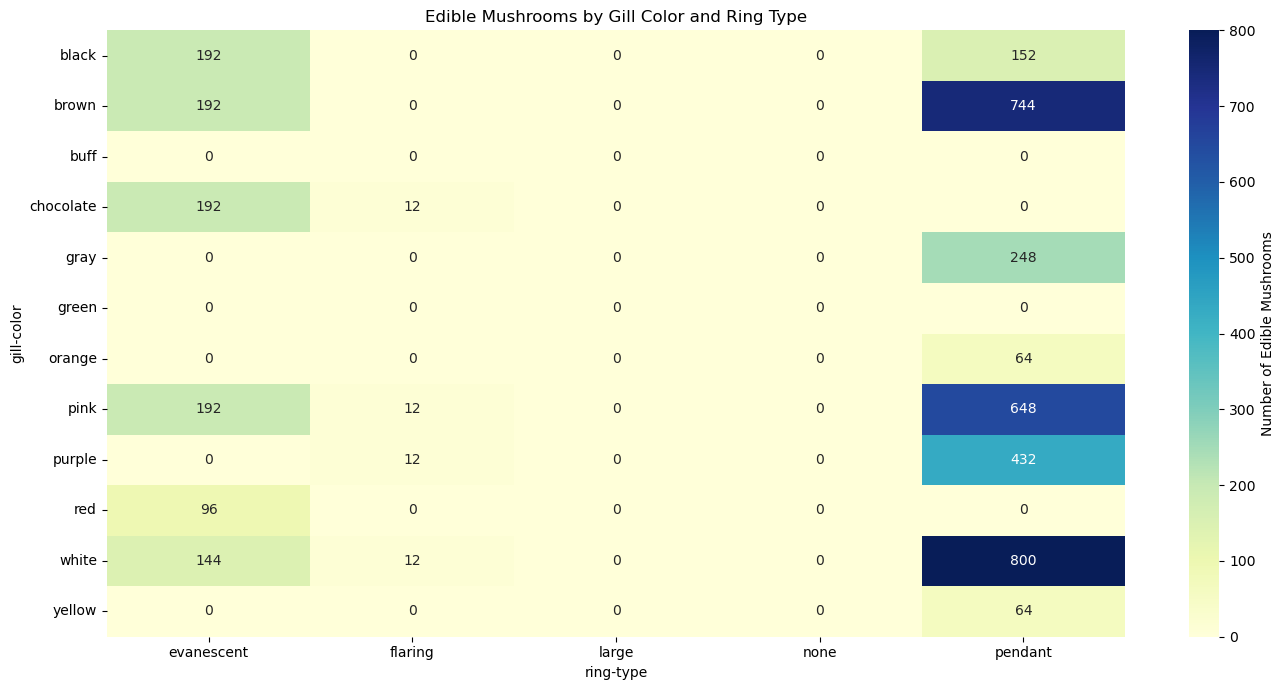

In [17]:
# Set the width and height of the figure
plt.figure(figsize=(14, 7))

# Create a crosstab for edible mushroom counts by 'gill-color' and 'ring-type'
edible_crosstab = pd.crosstab(index=df_mushroom['gill-color'], 
                              columns=df_mushroom['ring-type'], 
                              values=(df_mushroom['class'] == 'edible').astype(int),  # Sum of edible mushrooms
                              aggfunc='sum')

# Fill NaN values with 0 (for combinations with no observations)
edible_crosstab = edible_crosstab.fillna(0).astype(int)

# Add title for edible heatmap
plt.title("Edible Mushrooms by Gill Color and Ring Type")

# Heatmap showing the count of edible mushrooms for each combination of 'gill-color' and 'ring-type'
sns.heatmap(data=edible_crosstab, annot=True, fmt='.0f', cmap='YlGnBu', cbar_kws={'label': 'Number of Edible Mushrooms'})

# Show the plot
plt.tight_layout()
plt.show()

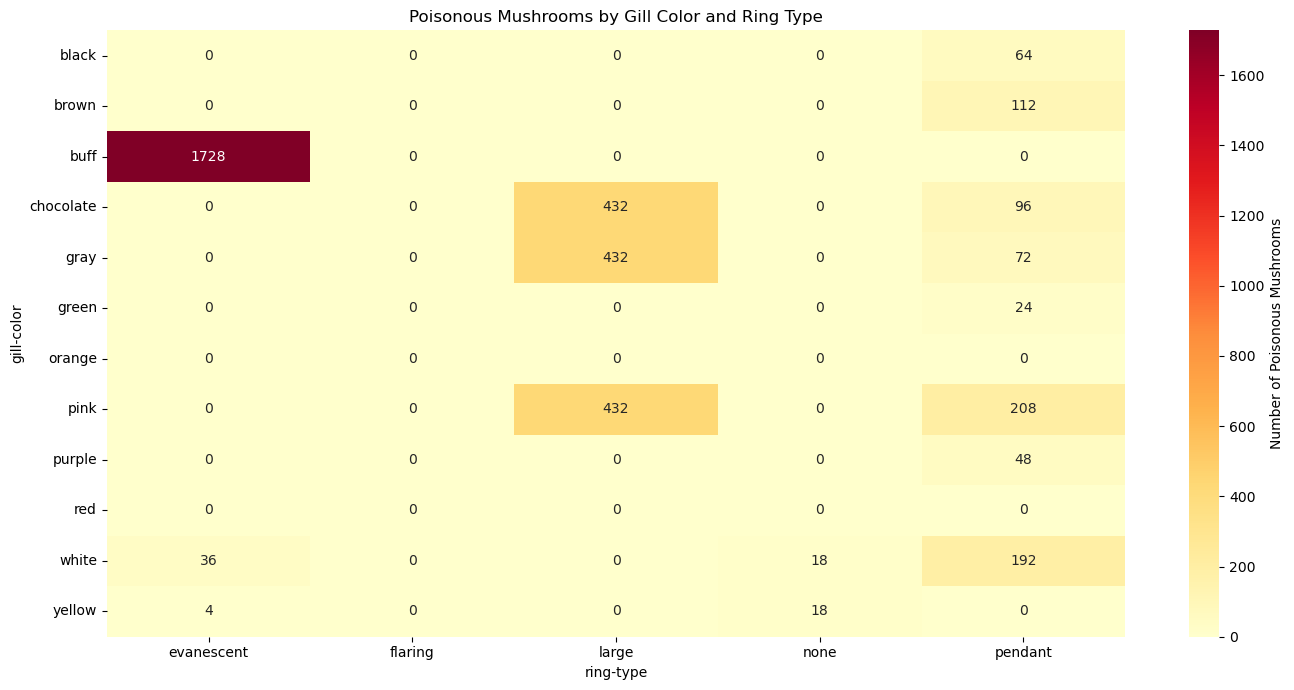

In [18]:
# Set the width and height of the figure for poisonous mushrooms heatmap
plt.figure(figsize=(14, 7))

# Create a crosstab for poisonous mushroom counts by 'gill-color' and 'ring-type'
poisonous_crosstab = pd.crosstab(index=df_mushroom['gill-color'], 
                                 columns=df_mushroom['ring-type'], 
                                 values=(df_mushroom['class'] == 'poisonous').astype(int),  # Sum of poisonous mushrooms
                                 aggfunc='sum')

# Fill NaN values with 0 (for combinations with no observations)
poisonous_crosstab = poisonous_crosstab.fillna(0).astype(int)

# Add title for poisonous heatmap
plt.title("Poisonous Mushrooms by Gill Color and Ring Type")

# Heatmap showing the count of poisonous mushrooms for each combination of 'gill-color' and 'ring-type'
sns.heatmap(data=poisonous_crosstab, annot=True, fmt='.0f', cmap='YlOrRd', cbar_kws={'label': 'Number of Poisonous Mushrooms'})

# Show the plot
plt.tight_layout()
plt.show()


***Q5 Proportion-Based Analysis*** 

Modify the heatmap to display the proportion of edible mushrooms instead of counts.

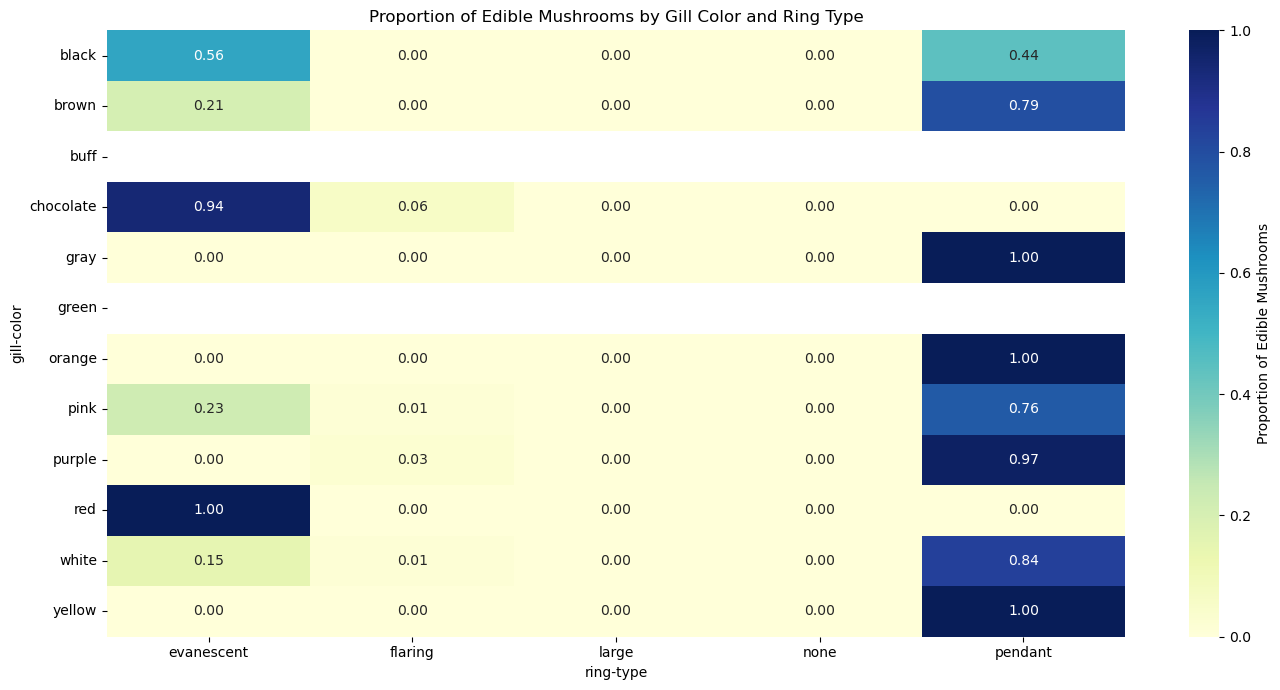

In [19]:
# Set the width and height of the figure for edible mushrooms
plt.figure(figsize=(14, 7))

# Create a crosstab for edible mushroom counts by 'gill-color' and 'ring-type'
edible_crosstab = pd.crosstab(index=df_mushroom['gill-color'], 
                              columns=df_mushroom['ring-type'], 
                              values=(df_mushroom['class'] == 'edible').astype(int),  # Sum of edible mushrooms
                              aggfunc='sum')

# Fill NaN values with 0 (for combinations with no observations)
edible_crosstab = edible_crosstab.fillna(0)

# Normalize the crosstab to get proportions (row-wise)
edible_crosstab_proportions = edible_crosstab.div(edible_crosstab.sum(axis=1), axis=0)

# Add title for edible heatmap
plt.title("Proportion of Edible Mushrooms by Gill Color and Ring Type")

# Heatmap showing the proportion of edible mushrooms for each combination of 'gill-color' and 'ring-type'
sns.heatmap(data=edible_crosstab_proportions, annot=True, fmt='.2f', cmap='YlGnBu', cbar_kws={'label': 'Proportion of Edible Mushrooms'})

# Show the plot
plt.tight_layout()
plt.show()

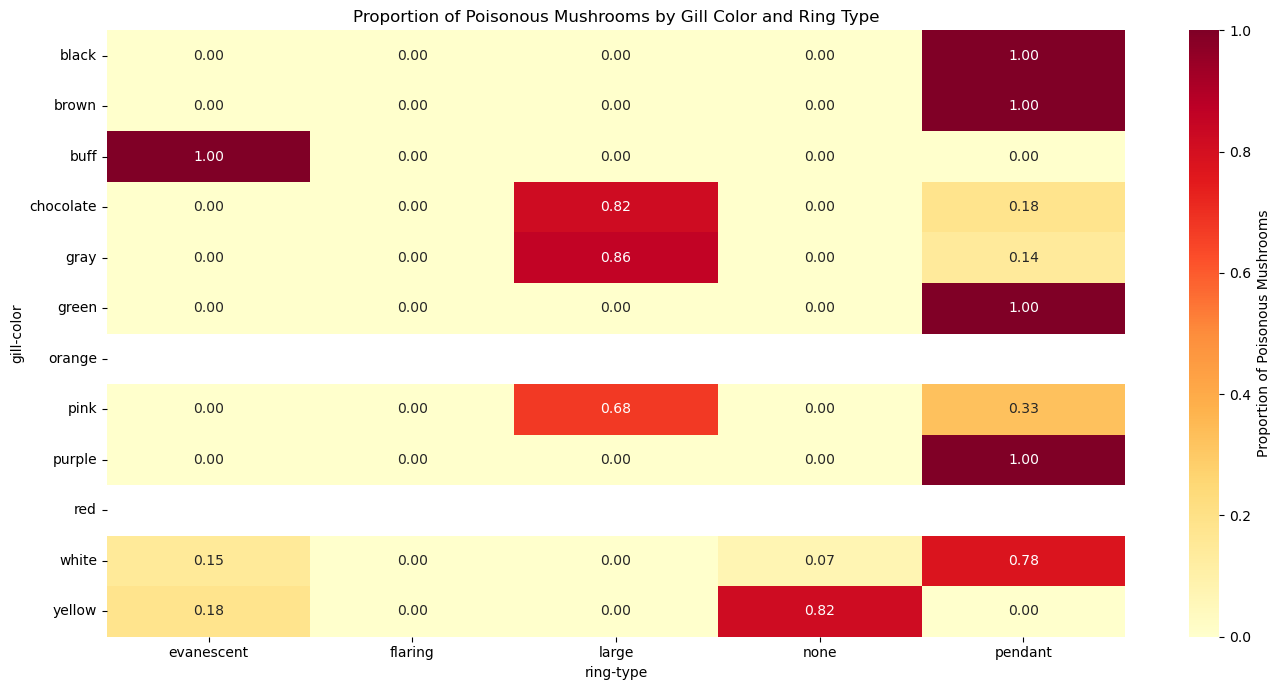

In [20]:
# Set the width and height of the figure for poisonous mushrooms heatmap
plt.figure(figsize=(14, 7))

# Create a crosstab for poisonous mushroom counts by 'gill-color' and 'ring-type'
poisonous_crosstab = pd.crosstab(index=df_mushroom['gill-color'], 
                                 columns=df_mushroom['ring-type'], 
                                 values=(df_mushroom['class'] == 'poisonous').astype(int),  # Sum of poisonous mushrooms
                                 aggfunc='sum')

# Fill NaN values with 0 (for combinations with no observations)
poisonous_crosstab = poisonous_crosstab.fillna(0)

# Normalize the crosstab to get proportions (row-wise)
poisonous_crosstab_proportions = poisonous_crosstab.div(poisonous_crosstab.sum(axis=1), axis=0)

# Add title for poisonous heatmap
plt.title("Proportion of Poisonous Mushrooms by Gill Color and Ring Type")

# Heatmap showing the proportion of poisonous mushrooms for each combination of 'gill-color' and 'ring-type'
sns.heatmap(data=poisonous_crosstab_proportions, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Proportion of Poisonous Mushrooms'})

# Show the plot
plt.tight_layout()
plt.show()


***Q6 Comparison of Insights from Counts vs. Proportions***

Compare the two heatmaps. What additional insights does the proportion-based view offer? How might this shift your interpretation?

> *Your answer goes here*

### Main Question

***Conclusion***

Remember our main question? Based on your visualizations and analyses, what **conclusion** would you draw? What can you say about the factors influencing mushroom edibility? Are there any combination of variable-values that stand out? Is there anything interesting you've found? Try to answer in depth.

> *Your answer goes here*

***Discussion***

Your analysis, like all research, has some limitations of course. What would be some of those limitations? How convinced are you about your conclusion? If possible, what data/information would you have wanted to be available to improve your research? Try to answer in depth. 

> *Your answer goes here*